<a href="https://colab.research.google.com/github/Yangster007/Python-Project/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: f"{x:,.2f}")

sns.set(style='whitegrid')

### Exercises – Section 1
1. Add another pandas display option to set the display width (hint: `display.width`).
2. Change the seaborn style from `'whitegrid'` to `'darkgrid'` and re-run a plot later.

## 2. Load the Dataset

In Colab, we typically upload a CSV file from our local machine and then read it with `pandas.read_csv()`.

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv")
df.head()
df.sample(10)

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
150038,03M403,The Global Learning Collaborative,High school,Algebra2/Trigonometry,2016,14,77.6,1,7.1,13,92.9,6,42.9,6,42.9
111394,07X655,Samuel Gompers Career and Technical Education ...,High school,Algebra2/Trigonometry,2015,7,60,4,57.1,3,42.9,1,14.3,1,14.3
88269,24Q267,High School of Applied Communication,High school,Common Core English,2015,57,75.2,16,28.1,41,71.9,31,54.4,37,64.9
25665,05M499,Frederick Douglass Academy,Secondary School,Geometry,2015,9,66.3,4,44.4,5,55.6,1,11.1,1,11.1
155748,07X381,Bronx Haven High School,High school,Integrated Algebra,2016,11,54.2,9,81.8,2,18.2,0,0,0,0
169450,12X242,Mott Hall V,Secondary School,Physical Settings/Earth Science,2015,1,s,s,s,s,s,s,s,na,na
182328,19K431,Thomas Jefferson Yabc,High school,Global History and Geography,2017,34,52.8,26,76.5,8,23.5,0,0,na,na
157404,08X282,Women's Academy of Excellence,High school,U.S. History and Government,2017,1,s,s,s,s,s,s,s,na,na
134433,30Q502,Information Technology High School,High school,Algebra2/Trigonometry,2017,11,s,s,s,s,s,s,s,na,na
172885,13K616,Brooklyn High School for Leadership and Community,High school,Common Core English,2016,1,s,s,s,s,s,s,s,na,na


### Exercises – Section 2
1. Show the first 10 rows instead of 5 using `df.head(10)`.
2. Use `df.sample(5)` to view 5 random rows. Why might this be useful?
3. Intentionally change `file_name` to something incorrect and run the cell. What error do you see?

## 3. First Look at the Data

We now inspect the basic structure of the dataset:
- Number of rows and columns (`df.shape`)
- Column names (`df.columns`)
- Data types and non-null counts (`df.info()`)
- Summary statistics for numeric columns (`df.describe()`).

In [4]:
print('Shape (rows, columns):', df.shape)

print('\nColumn names:')
print(df.columns)

print('\nData types and non-null counts:')
df.info()

print('\nSummary statistics (numeric columns):')
df.describe()

Shape (rows, columns): (212331, 15)

Column names:
Index(['School DBN', 'School Name', 'School Level', 'Regents Exam', 'Year',
       'Total Tested', 'Mean Score', 'Number Scoring Below 65',
       'Percent Scoring Below 65', 'Number Scoring 65 or Above',
       'Percent Scoring 65 or Above', 'Number Scoring 80 or Above',
       'Percent Scoring 80 or Above', 'Number Scoring CR',
       'Percent Scoring CR'],
      dtype='object')

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   School DBN                   212331 non-null  object
 1   School Name                  212331 non-null  object
 2   School Level                 212331 non-null  object
 3   Regents Exam                 212321 non-null  object
 4   Year                         212331 non-null  int64 
 5   Total Test

,Year,Total Tested
count,"212,331.00","212,331.00"
mean,"2,015.96",49.36
std,0.80,93.02
min,"2,015.00",1.00
25%,"2,015.00",5.00
50%,"2,016.00",20.00
75%,"2,017.00",57.00
max,"2,017.00","1,729.00"


### Exercises – Section 3
1. How many rows and columns does the dataset have?
2. From `df.info()`, list which columns are numeric and which are `object` (string-like).
3. Run `df.describe(include='all')` in a new cell. What extra information do you get?

## 4. Inspect Raw Data & Categorical Columns

Before cleaning, it's helpful to look at actual values to spot issues such as strange strings or inconsistent categories.

In [5]:
# First 10 rows
df.head(10)

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na
5,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2015,9,67.4,3,33.3,6,66.7,0,0,na,na
6,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2016,15,72.6,2,13.3,13,86.7,5,33.3,na,na
7,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2017,9,64.4,5,55.6,4,44.4,1,11.1,na,na
8,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2015,49,78.4,1,2,48,98,23,46.9,48,98
9,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2016,51,79,9,17.6,42,82.4,33,64.7,40,78.4


In [6]:
# Random sample of 5 rows
df.sample(5, random_state=42)

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
198472,28Q350,Jamaica Gateway to the Sciences,High school,Physical Settings/Earth Science,2015,45,70.6,11,24.4,34,75.6,11,24.4,na,na
100707,84M353,New Heights Academy Charter School,Secondary School,Geometry,2015,61,54.2,45,73.8,16,26.2,5,8.2,5,8.2
117361,11X509,High School of Language and Innovation,High school,Living Environment,2016,101,58.9,64,63.4,37,36.6,2,2,na,na
42854,22K555,Brooklyn College Academy,High school,Living Environment,2015,18,56.7,15,83.3,3,16.7,1,5.6,na,na
179934,17K590,Medgar Evers College Preparatory School,Secondary School,Physical Settings/Chemistry,2015,3,s,s,s,s,s,s,s,na,na


In [7]:
# Summary statistics for all columns (numeric + non-numeric)
df.describe(include='all')

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
count,212331,212331,212331,212321,"212,331.00","212,331.00",212331,212331,212331,212331,212331,212331,212331,212331,212331
unique,1018,1012,6,14,NaN,NaN,748,446,992,945,992,744,1000,707,999
top,26Q430,New Visions Charter High School for Advanced Math,High school,Common Core Algebra,NaN,NaN,s,s,s,s,s,s,s,na,na
freq,490,1337,151160,29254,NaN,NaN,75222,75222,75222,75222,75222,75222,75222,142680,142680
mean,NaN,NaN,NaN,NaN,"2,015.96",49.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,0.80,93.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,"2,015.00",1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,"2,015.00",5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,"2,016.00",20.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,"2,017.00",57.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Exercises – Section 4
1. Use `df.tail(8)` to view the last 8 rows. Do they look similar to the first rows?
2. Check unique values of `gender` using `df['gender'].unique()`.
3. Check the frequency of `work_type` using `df['work_type'].value_counts()`.

## 5. Missing Values & Unique Values

We want to know where data is missing and how many unique values each column has.

In [8]:
print('Missing values per column:')
print(df.isna().sum())

print('\nPercentage of missing values per column:')
print((df.isna().mean() * 100).round(2))

print('\nNumber of unique values per column:')
print(df.nunique())

Missing values per column:
School DBN                      0
School Name                     0
School Level                    0
Regents Exam                   10
Year                            0
Total Tested                    0
Mean Score                      0
Number Scoring Below 65         0
Percent Scoring Below 65        0
Number Scoring 65 or Above      0
Percent Scoring 65 or Above     0
Number Scoring 80 or Above      0
Percent Scoring 80 or Above     0
Number Scoring CR               0
Percent Scoring CR              0
dtype: int64

Percentage of missing values per column:
School DBN                    0.00
School Name                   0.00
School Level                  0.00
Regents Exam                  0.00
Year                          0.00
Total Tested                  0.00
Mean Score                    0.00
Number Scoring Below 65       0.00
Percent Scoring Below 65      0.00
Number Scoring 65 or Above    0.00
Percent Scoring 65 or Above   0.00
Number Scoring 80 or Ab

### Exercises – Section 5
1. Which column has the highest percentage of missing values?
2. Approximately what percentage of `bmi` values are missing?
3. How many unique categories does `smoking_status` have?

## 6. Basic Data Cleaning

We will:
1. Clean column names (lowercase, replace spaces with underscores)
2. Fix special missing values in `bmi` (e.g., 'N/A')
3. Convert `bmi` and `avg_glucose_level` to numeric types.

In [9]:
# 1. Clean column names
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(' ', '_')
      .str.replace('-', '_')
)
df.columns

Index(['school_dbn', 'school_name', 'school_level', 'regents_exam', 'year',
       'total_tested', 'mean_score', 'number_scoring_below_65',
       'percent_scoring_below_65', 'number_scoring_65_or_above',
       'percent_scoring_65_or_above', 'number_scoring_80_or_above',
       'percent_scoring_80_or_above', 'number_scoring_cr',
       'percent_scoring_cr'],
      dtype='object')

In [10]:
# Inspect unique values in school_name
df['school_name'].unique()[:20]

array(['P.S. 034 Franklin D. Roosevelt', 'P.S. 140 Nathan Straus',
       'P.S. 184m Shuang Wen', 'P.S. 188 The Island School',
       'Orchard Collegiate Academy',
       'Technology, Arts, and Sciences Studio',
       'University Neighborhood Middle School',
       'Collaborative Academy of Science, Technology, & La',
       'School for Global Leaders', 'University Neighborhood High School',
       'East Side Community School', 'Forsyth Satellite Academy',
       'Marta Valle High School',
       'Lower East Side Preparatory High School',
       'New Explorations into Science, Technology and Math',
       'Cascades High School', 'Bard High School Early College',
       'Tompkins Square Middle School',
       '47 The American Sign Language and English Secondar',
       'J.H.S. 104 Simon Baruch'], dtype=object)

In [11]:
# Replace 'N/A' with actual NaN and convert to numeric
df['school_name'] = df['school_name'].replace('N/A', np.nan)
df['regents_exam'] = df['regents_exam'].replace('N/A', np.nan)
df['mean_score'] = df['mean_score'].replace('N/A', np.nan)
df['school_name'] = pd.to_numeric(df['school_name'], errors='coerce')
df['mean_score'] = pd.to_numeric(df['mean_score'], errors='coerce')
df['regents_exam'] = pd.to_numeric(df['regents_exam'], errors='coerce')
df[['school_name', 'mean_score', 'regents_exam']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   school_name   0 non-null       float64
 1   mean_score    137109 non-null  float64
 2   regents_exam  0 non-null       float64
dtypes: float64(3)
memory usage: 4.9 MB


### Exercises – Section 6
1. Add another transformation to the column-name cleaning chain if needed.
2. Ensure `age` is numeric using `pd.to_numeric(df['age'], errors='coerce')`.
3. Create a new column `age_decade = df['age'] // 10`.

## 7. Handling Missing Values

We will impute missing numeric values with the **median**, which is robust to outliers.

In [12]:
# Check missing values again
df.isna().sum()

,0
school_dbn,0
school_name,212331
school_level,0
regents_exam,212331
year,0
total_tested,0
mean_score,75222
number_scoring_below_65,0
percent_scoring_below_65,0
number_scoring_65_or_above,0


In [13]:
# Median imputation for school_name and mean_score
school_name_median = df['school_name'].median()
mean_score_median = df['mean_score'].median()
df['school_name'] = df['school_name'].fillna(school_name_median)
df['mean_score'] = df['mean_score'].fillna(mean_score_median)
df.isna().sum()

,0
school_dbn,0
school_name,212331
school_level,0
regents_exam,212331
year,0
total_tested,0
mean_score,0
number_scoring_below_65,0
percent_scoring_below_65,0
number_scoring_65_or_above,0


### Exercises – Section 7
1. Compare the number of missing `bmi` values before and after imputation.
2. Compute the mean and median of `bmi`. Why might we prefer the median?
3. For a categorical column like `smoking_status`, what imputation strategy would you use?

## 8. Converting Columns to Categorical

For columns that represent categories (e.g., gender, work type, hypertension), we convert them to the `category` dtype.

In [14]:
categorical_cols = [
    'school_name', 'mean_score','total_tested', 'regents_exam'
]

for col in categorical_cols:
    df[col] = df[col].astype('category')

df[categorical_cols].dtypes

,0
school_name,category
mean_score,category
total_tested,category
regents_exam,category


### Exercises – Section 8
1. View the categories for `gender` using `df['gender'].cat.categories`.
2. Check how imbalanced `stroke` is using `df['stroke'].value_counts(normalize=True)`.
3. Convert your `age_decade` column (from Section 6) to categorical.

## 9. Descriptive Statistics – Numeric Columns

In [15]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_df.describe()

,year
count,"212,331.00"
mean,"2,015.96"
std,0.80
min,"2,015.00"
25%,"2,015.00"
50%,"2,016.00"
75%,"2,017.00"
max,"2,017.00"


In [16]:
print('school_name summary:')
print(df['school_name'].describe())

print('\mean_score summary:')
print(df['mean_score'].describe())

print('\total_tested summary:')
print(df['total_tested'].describe())

school_name summary:
count       0
unique      0
top       NaN
freq      NaN
Name: school_name, dtype: object
\mean_score summary:
count    212,331.00
unique       747.00
top           65.40
freq      75,747.00
Name: mean_score, dtype: float64
	otal_tested summary:
count     212331
unique      1126
top            1
freq       22010
Name: total_tested, dtype: int64


<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-3145334504.py:4: SyntaxWarning: invalid escape sequence '\m'
  print('\mean_score summary:')


### Exercises – Section 9
1. Which numeric column has the largest standard deviation?
2. What are the minimum and maximum ages in the dataset?
3. Compute the IQR (Q3 - Q1) for `bmi`.

## 10. Descriptive Statistics – Categorical Columns

In [17]:
def show_category_distribution(col_name):
    counts = df[col_name].value_counts()
    percents = df[col_name].value_counts(normalize=True) * 100
    display(pd.DataFrame({'count': counts, 'percent': percents.round(2)}))

for col in ['school_name', 'total_tested', 'mean_score']:
    print(f'--- {col} ---')
    show_category_distribution(col)
    print()

--- school_name ---


,count,percent
school_name,,



--- total_tested ---


,count,percent
total_tested,,
1,22010,10.37
2,12750,6.00
3,9168,4.32
4,7264,3.42
5,6263,2.95
...,...,...
1554,1,0.00
1629,1,0.00
1648,1,0.00



--- mean_score ---


,count,percent
mean_score,,
65.40,75747,35.67
63.30,555,0.26
64.30,555,0.26
62.30,552,0.26
63.80,550,0.26
...,...,...
26.90,1,0.00
30.50,1,0.00
30.20,1,0.00


### Exercises – Section 10
1. Which `work_type` appears most frequently?
2. What percentage of people fall into each `smoking_status` category?
3. Add `hypertension` to the loop and inspect its distribution.

## 11. Univariate Visualizations – Numeric

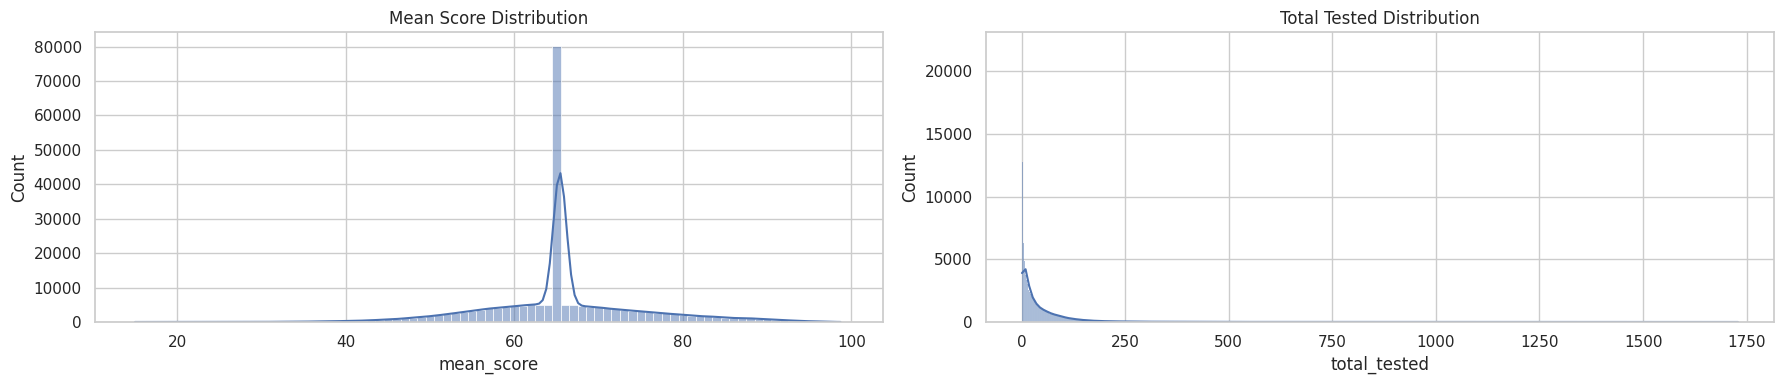

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(18, 4))

sns.histplot(df['mean_score'], bins=10, kde=True, ax=axes[0])
axes[0].set_title('Mean Score Distribution')

sns.histplot(df['total_tested'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Total Tested Distribution')

plt.tight_layout()
plt.show()

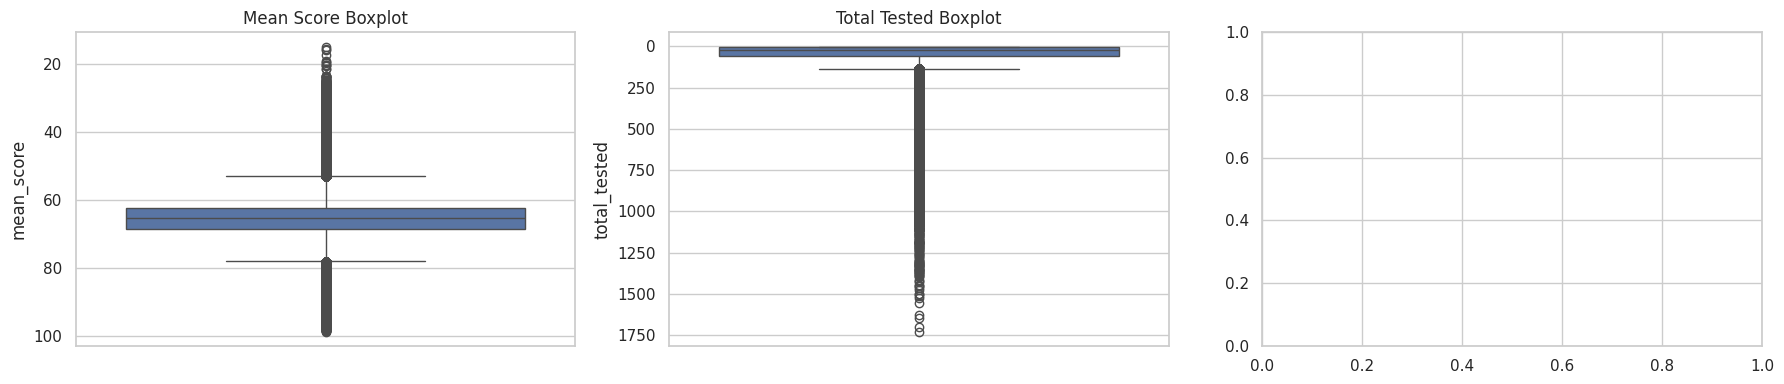

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

sns.boxplot(y=df['mean_score'], ax=axes[0])
axes[0].set_title('Mean Score Boxplot')

sns.boxplot(y=df['total_tested'], ax=axes[1])
axes[1].set_title('Total Tested Boxplot')

plt.tight_layout()
plt.show()

### Exercises – Section 11
1. Which numeric variable appears most skewed?
2. Which variable shows the most extreme outliers in the boxplots?
3. Create a single histogram of `age` with `bins=15` and add a title and axis labels.